# Select the US east coast

In [5]:
import numpy as np
import xarray as xr

from os.path import expanduser,join,isdir
import sys
user_home_dir = expanduser('~')
ecco_v4_py_dir = join(user_home_dir,'ECCOv4-py')
if isdir(ecco_v4_py_dir):
    sys.path.insert(0,ecco_v4_py_dir)
import ecco_v4_py as ecco
import ecco_v4_py.ecco_access as ea

import matplotlib.pyplot as plt
%matplotlib inline

## read all grid and coord

In [6]:
## change ECCO_dir as needed
ECCO_dir = join('/efs_ecco','ECCO_V4r4_PODAAC')

# for access_mode = 's3_open_fsspec', need to specify the root directory 
# containing the jsons
jsons_root_dir = join('/efs_ecco','mzz-jsons')
access_mode = 's3_open_fsspec'

## download file containing grid parameters and load into workspace
ShortNames_list = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4"]
grid_ds = ea.ecco_podaac_to_xrdataset(ShortNames_list,\
                                           StartDate='2010-01',EndDate='2010-12',\
                                           mode=access_mode,\
                                           download_root_dir=ECCO_dir,\
                                           max_avail_frac=0.5,\
                                           jsons_root_dir=jsons_root_dir).compute()
grid_ds

TypeError: Unsupported type for store_like: 'FSMap'

## read SSH

In [24]:
ShortNames_list = ["ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4"]
# retrieve files
StartDate = '1993-01'
EndDate = '2017-12'
ds = ea.ecco_podaac_to_xrdataset(ShortNames_list,\
                                      StartDate=StartDate,EndDate=EndDate,\
                                      mode=access_mode,\
                                      download_root_dir=ECCO_dir,\
                                      max_avail_frac=0.5,\
                                      jsons_root_dir=jsons_root_dir)
## Merge the grid and variable datasets to make the ecco_ds
ecco_ds = xr.merge(ds.values())

In [27]:
ecco_ds.data_vars
# ecco_ds.time

Data variables:
    ETAN      (time, tile, j, i) float32 126MB dask.array<chunksize=(300, 13, 90, 90), meta=np.ndarray>
    SSH       (time, tile, j, i) float32 126MB dask.array<chunksize=(300, 13, 90, 90), meta=np.ndarray>
    SSHIBC    (time, tile, j, i) float32 126MB dask.array<chunksize=(300, 13, 90, 90), meta=np.ndarray>
    SSHNOIBC  (time, tile, j, i) float32 126MB dask.array<chunksize=(300, 13, 90, 90), meta=np.ndarray>

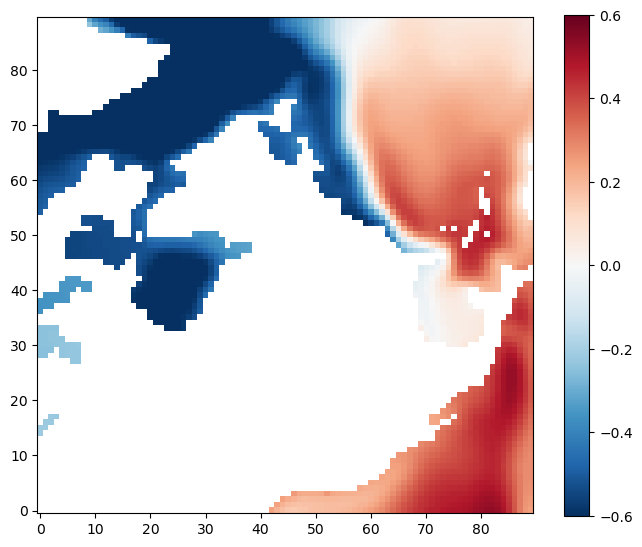

In [30]:
fig=plt.figure(figsize=(8, 6.5))
plt.imshow(ecco_ds.SSH.values[0,10,:,:], origin='lower', vmin=-.6, vmax=.6, cmap='RdBu_r')
plt.colorbar()

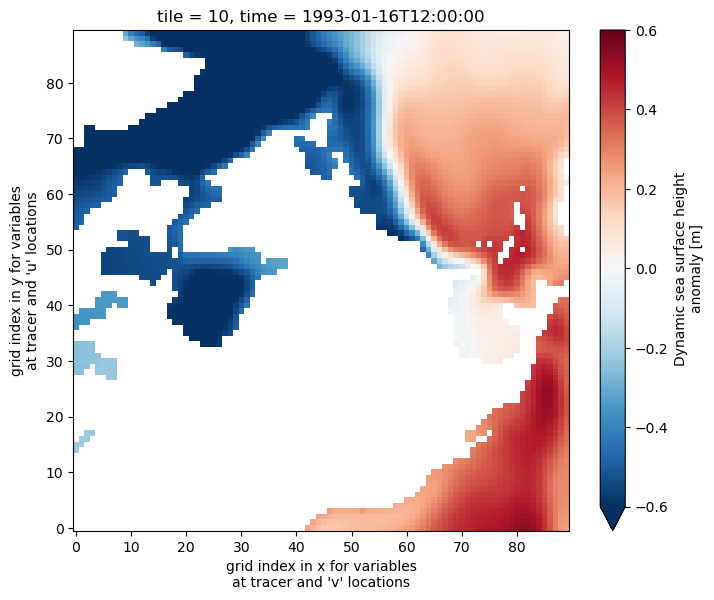

In [36]:
fig=plt.figure(figsize=(8, 6.5))
ecco_ds.SSH.isel(tile=10,time=0).plot(vmin=-.6, vmax=.6, cmap='RdBu_r') 
# plt.colorbar()